## Step 1 Data Processing

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
ls '/content/gdrive/My Drive/data/cats-dogs/'

test/  train/  validation/


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_dir = '/content/gdrive/My Drive/data/cats-dogs/train/'
test_dir = '/content/gdrive/My Drive/data/cats-dogs/test/'
validation_dir = '/content/gdrive/My Drive/data/cats-dogs/validation/'

## Step 2 Model

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

## Step 3 Compile the Model

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Step 4 Train the Model

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                     target_size=(150,150),
                                     batch_size=20,
                                     class_mode='binary')

Found 1000 images belonging to 2 classes.


In [33]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                     target_size=(150,150),
                                     batch_size=12,
                                     class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 16s 156ms/step - loss: 0.6863 - acc: 0.5520 - val_loss: 0.6709 - val_acc: 0.6017
Epoch 2/10
100/100 [==============================] - 14s 137ms/step - loss: 0.6256 - acc: 0.6625 - val_loss: 0.6159 - val_acc: 0.6453
Epoch 3/10
100/100 [==============================] - 14s 139ms/step - loss: 0.5589 - acc: 0.7105 - val_loss: 0.5828 - val_acc: 0.6950
Epoch 4/10
100/100 [==============================] - 14s 138ms/step - loss: 0.5112 - acc: 0.7480 - val_loss: 0.7074 - val_acc: 0.6014
Epoch 5/10
100/100 [==============================] - 14s 138ms/step - loss: 0.4662 - acc: 0.7780 - val_loss: 0.5602 - val_acc: 0.7083
Epoch 6/10
100/100 [==============================] - 14s 137ms/step - loss: 0.4177 - acc: 0.8100 - val_loss: 0.6022 - val_acc: 0.6875
Epoch 7/10
100/100 [==============================] - 14s 137ms/step - loss: 0.3772 - acc: 0.8260 - val_loss: 0.5443 - val_acc: 0.7348
Epoch 8/10
100/100 [==============================] - 1

In [0]:
import matplotlib.pyplot as plt

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

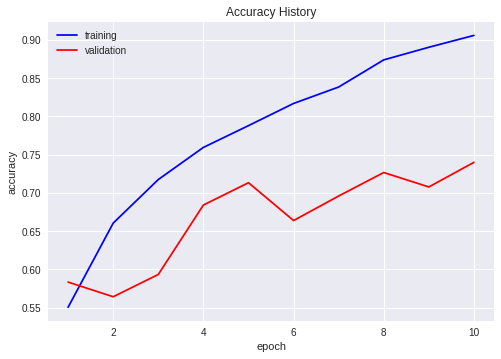

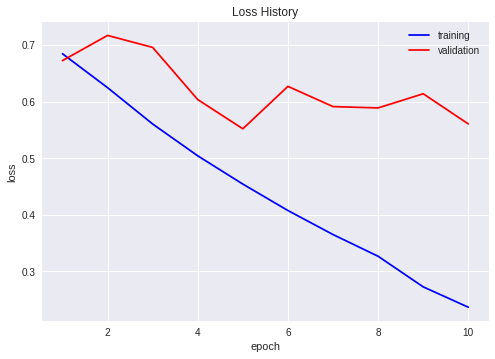

In [0]:

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy History')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'])

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'])

plt.show()

In [0]:
model.save('/content/gdrive/My Drive/data/cats-dogs/cats-dogs.h5')